In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#loading the dataset
df = pd.read_csv("train.csv")
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [3]:
#checking number of datapoints
df.shape

(20800, 5)

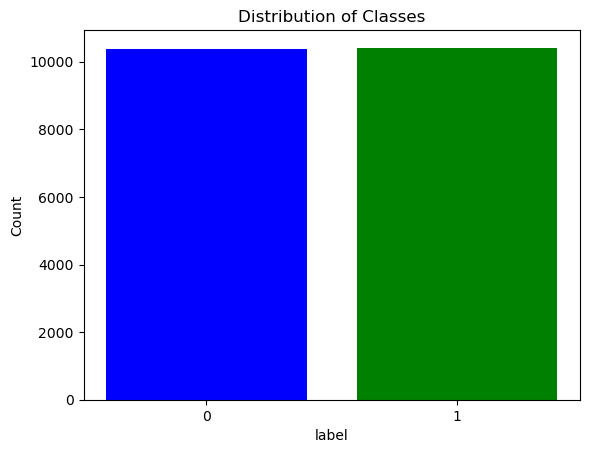

1    10413
0    10387
Name: label, dtype: int64


In [4]:
counts = df['label'].value_counts()

#coubntplot for distribution of classes
plt.bar(counts.index, counts.values,color=['g','b'])

# Set the title and axis labels
plt.title('Distribution of Classes')
plt.xlabel('label')
plt.ylabel('Count')
plt.xticks([0, 1])

# Display the plot
plt.show()

# Print the value counts of each class
print(df['label'].value_counts())

In [5]:
#checking the percentage difference 
print(round(df.label.value_counts(normalize=True),2)*100);

1    50.0
0    50.0
Name: label, dtype: float64


In [6]:
#counting missing values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
#handling missing values
df = df.fillna(' ')

In [8]:
#checking missing values again
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
#feature selection, adding new column "article", after merging the "title" and "author" columns
df['article'] = df['author'] + " " + df['title'] 
df.head(10)

,id,title,author,text,label,article
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Daniel Nussbaum Jackie Mason: Hollywood Would ...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,Life: Life Of Luxury: Elton John’s 6 Favorit...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Alissa J. Rubin Benoît Hamon Wins French Socia...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,Excerpts From a Draft Script for Donald Trum...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,Megan Twohey and Scott Shane A Back-Channel Pl...


In [10]:
from nltk.corpus import stopwords # unnecessary words like of, the, is, etc.
import nltk
nltk.download('stopwords') #downloading stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\14703\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from nltk.stem.porter import PorterStemmer #reducing words to their root, for example working, worked, worker, work = work
import re #regular expression
#Stemming 
ps = PorterStemmer()

def stem(article):
    stemmed = re.sub('[^a-zA-Z]',' ',article) #subtracting everything that isn't a letter using regular expression
    stemmed = stemmed.lower() #converting to lowercase
    words = stemmed.split()
    stemmed_words = []
    for word in words:
        if word not in stopwords.words('english'):
            stemmed_words.append(ps.stem(word))
    stemmed = ' '.join(stemmed_words) #joining the words from the list and converting back into sentence
    return stemmed

In [12]:
df['article']= df['article'].apply(stem)

In [13]:
df['article']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: article, Length: 20800, dtype: object

In [14]:
df.head(10)

,id,title,author,text,label,article
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,daniel nussbaum jacki mason hollywood would lo...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,life life luxuri elton john favorit shark pict...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,alissa j rubin beno hamon win french socialist...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,excerpt draft script donald trump q ampa black...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,megan twohey scott shane back channel plan ukr...


In [15]:
predictor = df['article'].values
target = df['label'].values

In [16]:
print(predictor)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [17]:
#converting text from 'article' into numerical/vector data
from sklearn.feature_extraction.text import TfidfVectorizer #for converting text/words to numerical/vector form
vector = TfidfVectorizer()
vector.fit(predictor)
predictor = vector.transform(predictor)

In [18]:
print(predictor)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(predictor, target, test_size = 0.25, stratify=target, random_state=75)

training accuracy of logistic regression model is:  0.9868589743589744
testing accuracy of logistic regression model is:  0.9730769230769231
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2597
           1       0.96      0.99      0.97      2603

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200

AUC Score =  0.9730595795171917


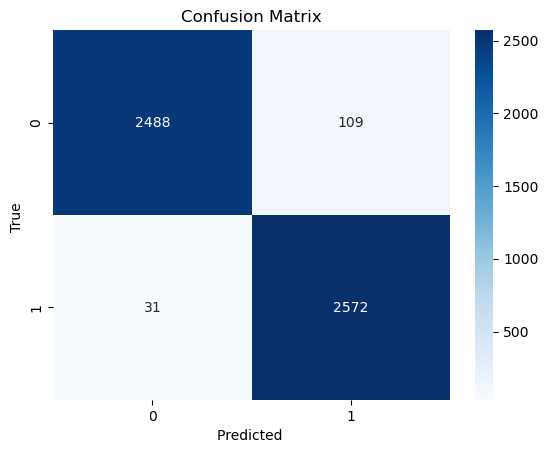

In [20]:
#Logistic Regression- Model 1
from sklearn.metrics import confusion_matrix

#training the model
model_1 = LogisticRegression(random_state=75)
model_1.fit(X_train,Y_train)
train_y_pred = model_1.predict(X_train)

#printing training and test accuracy
print("training accuracy of logistic regression model is: ", accuracy_score(train_y_pred,Y_train))
test_y_pred = model_1.predict(X_test)
print("testing accuracy of logistic regression model is: ", accuracy_score(test_y_pred,Y_test))
report = classification_report(Y_test,test_y_pred)
print(report)
auc_score = roc_auc_score(Y_test, test_y_pred)
print("AUC Score = ", auc_score)

#confusion matrix
cm = confusion_matrix(Y_test, test_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()



training accuracy of random forest classifier is:  1.0
testing accuracy of random forest classifier is:  0.9901923076923077
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2597
           1       0.99      1.00      0.99      2603

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200

AUC Score =  0.9901867472900481


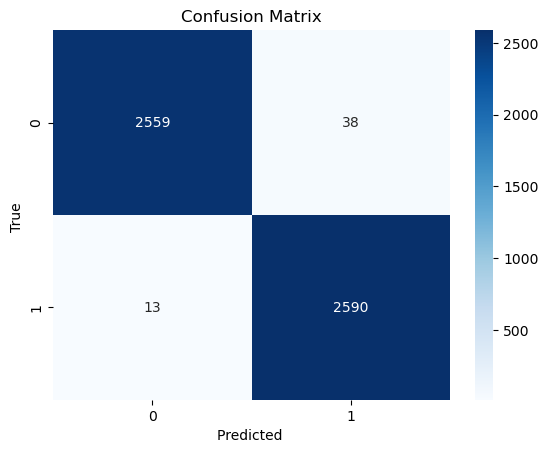

In [21]:
#Random Forest- Model 2
from sklearn.metrics import confusion_matrix

#training the model
model_2 = RandomForestClassifier(random_state = 75)
model_2.fit(X_train,Y_train)
train_y_pred = model_2.predict(X_train)

#printing training and test accuracy
print("training accuracy of random forest classifier is: ", accuracy_score(train_y_pred,Y_train))
test_y_pred = model_2.predict(X_test)
print("testing accuracy of random forest classifier is: ", accuracy_score(test_y_pred,Y_test))
report = classification_report(Y_test,test_y_pred)
print(report)
auc_score = roc_auc_score(Y_test, test_y_pred)
print("AUC Score = ", auc_score)

#confusion matrix
cm = confusion_matrix(Y_test, test_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()

training accuracy of decision tree classifier is:  1.0
testing accuracy of decision tree classifier is:  0.9948076923076923
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2597
           1       1.00      0.99      0.99      2603

    accuracy                           0.99      5200
   macro avg       0.99      0.99      0.99      5200
weighted avg       0.99      0.99      0.99      5200

AUC Score =  0.994807907288634


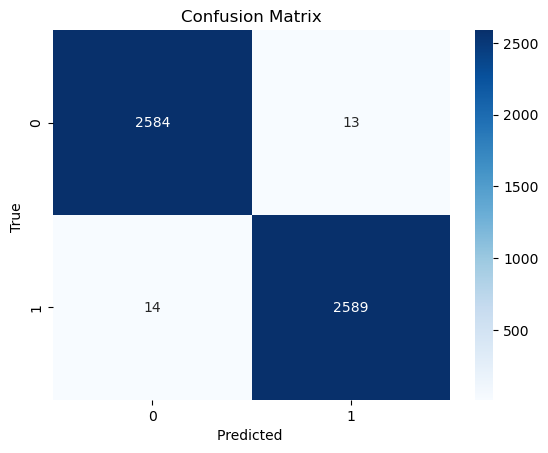

In [22]:
#Decision Tree- Model 3
from sklearn.metrics import confusion_matrix

#training the model
model_3 = DecisionTreeClassifier(random_state=75)
model_3.fit(X_train,Y_train)
train_y_pred = model_3.predict(X_train)

#printing training and test accuracy
print("training accuracy of decision tree classifier is: ", accuracy_score(train_y_pred,Y_train))
test_y_pred = model_3.predict(X_test)
print("testing accuracy of decision tree classifier is: ", accuracy_score(test_y_pred,Y_test))
report = classification_report(Y_test,test_y_pred)
print(report)
auc_score = roc_auc_score(Y_test, test_y_pred)
print("AUC Score = ", auc_score)

#confusion matrix
cm = confusion_matrix(Y_test, test_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()


training accuracy of multinomial naive bayes is:  0.976474358974359
testing accuracy of multinomial naive bayes is:  0.9526923076923077
              precision    recall  f1-score   support

           0       0.92      1.00      0.95      2597
           1       1.00      0.91      0.95      2603

    accuracy                           0.95      5200
   macro avg       0.96      0.95      0.95      5200
weighted avg       0.96      0.95      0.95      5200

AUC Score =  0.952742392704369


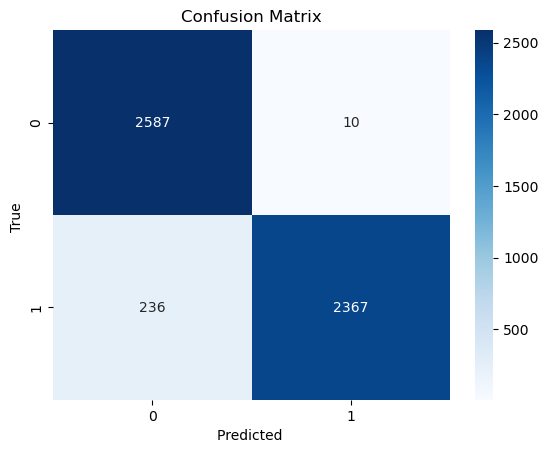

In [23]:
#Naive Bayes- model 4
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

#training the model
model_4 = MultinomialNB()
model_4.fit(X_train,Y_train)
train_y_pred = model_4.predict(X_train)

#printing training and test accuracy
print("training accuracy of multinomial naive bayes is: ", accuracy_score(train_y_pred,Y_train))
test_y_pred = model_4.predict(X_test)
print("testing accuracy of multinomial naive bayes is: ", accuracy_score(test_y_pred,Y_test))
report = classification_report(Y_test,test_y_pred)
print(report)
auc_score = roc_auc_score(Y_test, test_y_pred)
print("AUC Score = ", auc_score)

#confusion matrix
cm = confusion_matrix(Y_test, test_y_pred)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()